Import the packages needed to perform the analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Import the data
mov = pd.read_csv('Section6-Homework-Data.csv', encoding = 'latin1')

In [4]:
# Explore the dataset
mov.head(3)

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1


In [7]:
# Check the summary of the dataframe
mov.describe()

,Budget ($mill),IMDb Rating,MovieLens Rating,Overseas%,Profit%,Runtime (min),US ($mill),Gross % US
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,92.467928,6.923849,3.340378,57.698849,719.278783,117.781250,167.135197,42.301151
std,59.421407,0.925890,0.454071,12.334237,1942.807248,23.179122,92.465903,12.334237
min,0.600000,3.600000,1.490000,17.200000,7.700000,30.000000,0.000000,0.000000
25%,45.000000,6.375000,3.037500,49.900000,201.850000,100.000000,106.950000,33.700000
50%,80.000000,6.900000,3.365000,58.200000,338.550000,116.000000,141.700000,41.800000
75%,130.000000,7.600000,3.672500,66.300000,650.100000,130.250000,202.100000,50.100000
max,300.000000,9.200000,4.500000,100.000000,41333.300000,238.000000,760.500000,82.800000


In [8]:
# Check the structure of the dataframe
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
Day of Week               608 non-null object
Director                  608 non-null object
Genre                     608 non-null object
Movie Title               608 non-null object
Release Date              608 non-null object
Studio                    608 non-null object
Adjusted Gross ($mill)    608 non-null object
Budget ($mill)            608 non-null float64
Gross ($mill)             608 non-null object
IMDb Rating               608 non-null float64
MovieLens Rating          608 non-null float64
Overseas ($mill)          608 non-null object
Overseas%                 608 non-null float64
Profit ($mill)            608 non-null object
Profit%                   608 non-null float64
Runtime (min)             608 non-null int64
US ($mill)                608 non-null float64
Gross % US                608 non-null float64
dtypes: float64(7), int64(1), object(10)
memory usage: 85.6+ 

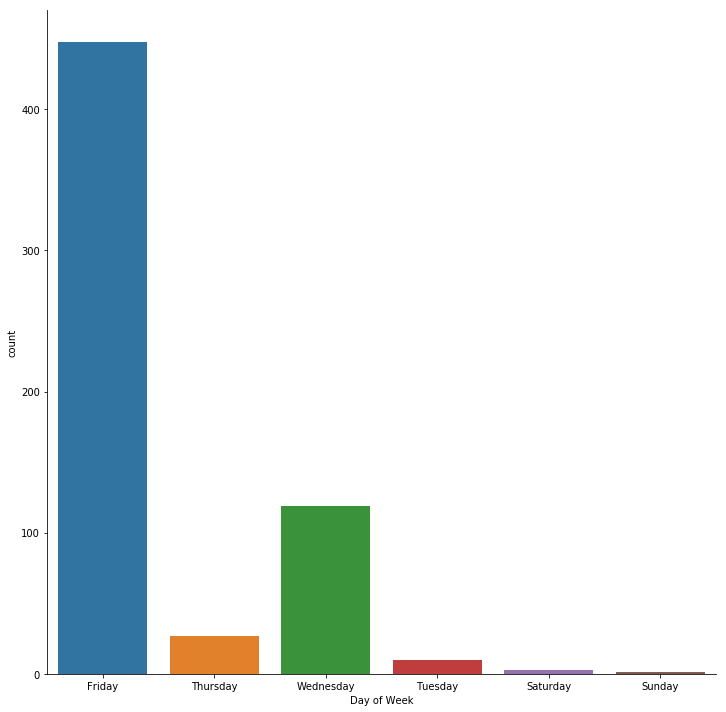

In [9]:
vis1=sns.factorplot(data=mov,x='Day of Week',kind='count',size=10)

In [10]:
# Explore the categorical variable Studio, used in the assignment
mov.Studio.unique()

array(['Buena Vista Studios', 'Lionsgate', 'Sony', 'Universal',
       'Paramount Pictures', 'WB', 'Weinstein Company',
       'UA Entertainment', 'WB/New Line', 'New Line Cinema', 'Fox',
       'TriStar', 'Relativity Media', 'Screen Gems', 'StudioCanal',
       'Fox Searchlight Pictures', 'MiraMax', 'Path_ Distribution',
       'DreamWorks', 'Lionsgate Films', 'Revolution Studios',
       'Dimension Films', 'USA', 'Lionsgate/Summit',
       'Sony Picture Classics', 'Pacific Data/DreamWorks', 'Disney',
       'Art House Studios', 'Colombia Pictures', 'Gramercy Pictures',
       'Summit Entertainment', 'Vestron Pictures', 'MGM', 'Orion', 'IFC',
       'New Market Films'], dtype=object)

In [11]:
# Explore the categorical variable Studio, used in the assignment
mov.Genre.unique()

array(['action', 'comedy', 'adventure', 'horror', 'animation',
       'biography', 'drama', 'musical', 'sci-fi', 'crime', 'romance',
       'fantasy', 'mystery', 'thriller', 'documentary'], dtype=object)

In [13]:
len(mov.Studio.unique())

36

In [24]:
mov22=mov[(mov.Studio=='Fox') | (mov.Studio=='WB')]

In [25]:
mov22.Genre.unique()

array(['animation', 'comedy', 'action', 'adventure', 'drama', 'fantasy',
       'crime', 'horror', 'thriller', 'biography', 'romance', 'sci-fi'],
      dtype=object)

In [26]:
# Filter the dataframe by genre
genre_filters=['action','adventure','animation','comedy','Universal','drama']
mov2=mov[mov.Genre.isin(genre_filters)]
mov2

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
5,Friday,David Ayer,action,Fury,17/10/2014,Sony,212.8,80.0,211.8,5.8,2.85,126,59.5,131.8,164.8,134,85.8,40.5
6,Thursday,Rob Marshall,adventure,Into the Woods,25/12/2014,Buena Vista Studios,213.9,50.0,212.9,6.0,3.16,84.9,39.9,162.9,325.8,125,128.0,60.1
7,Friday,Daniel Espinosa,action,Safe House,10/02/2012,Universal,215.5,85.0,208.1,6.8,3.45,81.7,39.3,123.1,144.8,115,126.4,60.7
8,Friday,Gary Shore,action,Dracula Untold,10/10/2014,Universal,216.5,70.0,215.5,6.3,2.92,159.2,73.9,145.5,207.9,92,56.3,26.1
10,Friday,Eric Brevig,animation,Yogi Bear,17/12/2010,WB,219.9,80.0,201.6,4.5,2.17,101.3,50.3,121.6,152.0,80,100.2,49.7


In [29]:
# Filter the dataframe by genre
mov2a = mov[(mov.Genre == 'action') | (mov.Genre == 'adventure') | (mov.Genre== 'animation') | (mov.Genre == 'comedy') | (mov.Genre == 'drama')]
mov2a

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
5,Friday,David Ayer,action,Fury,17/10/2014,Sony,212.8,80.0,211.8,5.8,2.85,126,59.5,131.8,164.8,134,85.8,40.5
6,Thursday,Rob Marshall,adventure,Into the Woods,25/12/2014,Buena Vista Studios,213.9,50.0,212.9,6.0,3.16,84.9,39.9,162.9,325.8,125,128.0,60.1
7,Friday,Daniel Espinosa,action,Safe House,10/02/2012,Universal,215.5,85.0,208.1,6.8,3.45,81.7,39.3,123.1,144.8,115,126.4,60.7
8,Friday,Gary Shore,action,Dracula Untold,10/10/2014,Universal,216.5,70.0,215.5,6.3,2.92,159.2,73.9,145.5,207.9,92,56.3,26.1
10,Friday,Eric Brevig,animation,Yogi Bear,17/12/2010,WB,219.9,80.0,201.6,4.5,2.17,101.3,50.3,121.6,152.0,80,100.2,49.7


In [23]:
# Filter the dataframe by studio
studio_filters=['Buena Vista Studios','Fox','Paramount Pictures','Sony','Universal','WB']
mov3=mov2[mov2.Studio.isin(studio_filters)]


In [33]:
# Filter the dataframe by studio
mov3 = mov2[(mov2.Studio== 'Buena Vista Studios') | (mov2.Studio== 'Fox') | (mov2.Studio == 'Paramount Pictures') | (mov2.Studio== 'Sony') | (mov2.Studio == 'Universal') | (mov2.Studio == 'WB')]
mov3.head(3)

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7


In [32]:
# Check how the filters worked
print (mov2.Genre.unique())
print (mov3.Studio.unique())
print (len(mov2.Genre.unique()))

['action' 'comedy' 'adventure' 'animation' 'drama']
['Buena Vista Studios' 'Sony' 'Universal' 'WB' 'Paramount Pictures' 'Fox']
5


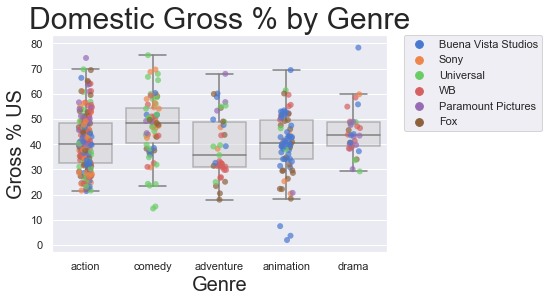

In [35]:
# Define the style
sns.set(style="darkgrid", palette="muted", color_codes=True)

# Plot the boxsplots
ax = sns.boxplot(data=mov3, x='Genre', y='Gross % US', orient='v', color='lightgray', showfliers=False)
plt.setp(ax.artists, alpha=0.5)

# Add in points to show each observation
sns.stripplot(x='Genre', y='Gross % US', data=mov3, jitter=True, size=6, linewidth=0, hue = 'Studio', alpha=0.7)

ax.axes.set_title('Domestic Gross % by Genre',fontsize=30)
ax.set_xlabel('Genre',fontsize=20)
ax.set_ylabel('Gross % US',fontsize=20)

# Define where to place the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)